# TAASSC Prep

### Table of Contents
- [Converting PELIC Data to Text Files](#Converting-PELIC-Data-to-Text-Files)
- [TAASSC Processing](#TAASSC-Processing)
    * [T-Units per Sentence](#T-Units-per-Sentence)
    * [Mean Length of T-Units](#Mean-Length-of-T-Units)
    * [Clauses per T-Unit](#Clauses-per-T-Unit)
    * [Mean Length of Clauses](#Mean-Length-of-Clauses)
    * [Prepositions per Clause](#Prepositions-per-Clause)
    * [Subordinating-Conjunctions-per-Clause](#Subordinating-Conjunctions-per-Clause)
- [Summary](#Summary)

This Jupyter notebook highlights my process of generating the various measures of syntactic complexity that I'll be using in later analysis.
I'll be processing the PELIC dataset using [TAASCC](https://www.linguisticanalysistools.org/taassc.html), a tool for calculating a wide variety of indices of syntactic complexity.
The exact indices of interest are outlined in `progress-report.md`.

Since TAASCC only takes text files as input, I'll have to first write every writing sample to a separate text file.
These text files will be analyzed by TAASCC and the results will be written to a CSV file.
I intend to do some exploratory data analysis thereafter, but the contents of this CSV file will serve as the basis for the statistical analysis to come.

## Converting PELIC Data to Text Files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (20, 10)})

In [2]:
pelic = pd.read_csv("data/PELIC_compiled.csv")
pelic.head()

,answer_id,anon_id,L1,gender,semester,placement_test,course_id,level_id,class_id,question_id,version,text_len,text,tokens,tok_lem_POS
0,1,eq0,Arabic,Male,2006_fall,NaN,149,4,g,5,1,177,I met my friend Nife while I was studying in a...,"['I', 'met', 'my', 'friend', 'Nife', 'while', ...","[('I', 'I', 'PRP'), ('met', 'meet', 'VBD'), ('..."
1,2,am8,Thai,Female,2006_fall,NaN,149,4,g,5,1,137,"Ten years ago, I met a women on the train betw...","['Ten', 'years', 'ago', ',', 'I', 'met', 'a', ...","[('Ten', 'ten', 'CD'), ('years', 'year', 'NNS'..."
2,3,dk5,Turkish,Female,2006_fall,NaN,115,4,w,12,1,63,In my country we usually don't use tea bags. F...,"['In', 'my', 'country', 'we', 'usually', 'do',...","[('In', 'in', 'IN'), ('my', 'my', 'PRP$'), ('c..."
3,4,dk5,Turkish,Female,2006_fall,NaN,115,4,w,13,1,6,I organized the instructions by time.,"['I', 'organized', 'the', 'instructions', 'by'...","[('I', 'I', 'PRP'), ('organized', 'organize', ..."
4,5,ad1,Korean,Female,2006_fall,NaN,115,4,w,12,1,59,"First, prepare a port, loose tea, and cup.\nSe...","['First', ',', 'prepare', 'a', 'port', ',', 'l...","[('First', 'first', 'RB'), (',', ',', ','), ('..."


In [3]:
pelic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46204 entries, 0 to 46203
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answer_id       46204 non-null  int64  
 1   anon_id         46204 non-null  object 
 2   L1              46204 non-null  object 
 3   gender          46204 non-null  object 
 4   semester        46204 non-null  object 
 5   placement_test  23563 non-null  float64
 6   course_id       46204 non-null  int64  
 7   level_id        46204 non-null  int64  
 8   class_id        46204 non-null  object 
 9   question_id     46204 non-null  int64  
 10  version         46204 non-null  int64  
 11  text_len        46204 non-null  int64  
 12  text            46204 non-null  object 
 13  tokens          46204 non-null  object 
 14  tok_lem_POS     46204 non-null  object 
dtypes: float64(1), int64(6), object(8)
memory usage: 5.3+ MB


In [4]:
# I've already run this so I'm not going to run it again

# for i in range(len(pelic)):
#     with open(f"data/text/{pelic.iloc[i]['answer_id']}.txt", "w") as f:
#         f.write(pelic.iloc[i]["text"])

The shell command `ls | wc -l` outputs `46204`, so I know that the correct number of files were created and written.

I tried to process all of the data with TAASCC, but it was taking so long that I decided to stop and just process the first 100 writing samples instead:

In [5]:
# Since it'd take days to process the whole dataset with TAASCC, I'll only process the writing samples in the sample dataset for now

# pelic_sample = pd.read_csv("data_samples/pelic-sample.csv")
# for i in range(len(pelic_sample)):
#     with open(f"data_samples/text/{pelic.iloc[i]['answer_id']}.txt", "w") as f:
#         f.write(pelic.iloc[i]["text"])

The shell command `ls | wc -l` outputs `100`, so I know that the correct number of files were created and written.

## TAASSC Processing

Now that TAASSC has processed the writing samples, let's take a look at some of the numerical measures generated:

In [6]:
taassc = pd.read_csv("data_samples/taassc.csv")
taassc_sca = pd.read_csv("data_samples/taassc_sca.csv")

In [7]:
taassc.head()

,filename,nwords,cl_av_deps,cl_ndeps_std_dev,acomp_per_cl,advcl_per_cl,agent_per_cl,cc_per_cl,ccomp_per_cl,conj_per_cl,...,prep_per_cl,prepc_per_cl,prt_per_cl,tmod_per_cl,xcomp_per_cl,xsubj_per_cl,advmod_per_cl,aux_per_cl,auxpass_per_cl,modal_per_cl
0,22.txt,3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,32.txt,57,2.454545,1.372697,0.000000,0.090909,0.0,0.0,0.0,0.181818,...,0.090909,0.0,0.0,0.0,0.090909,0.0,0.363636,0.090909,0.0,0.181818
2,40.txt,10,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000000
3,112.txt,44,2.500000,0.957427,0.166667,0.166667,0.0,0.0,0.0,0.166667,...,0.166667,0.0,0.0,0.0,0.166667,0.0,0.333333,0.333333,0.0,0.166667
4,92.txt,6,2.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000


In [8]:
taassc_sca.head()

,filename,nwords,MLS,MLT,MLC,C_S,VP_T,C_T,DC_C,DC_T,T_S,CT_T,CP_T,CP_C,CN_T,CN_C
0,22.txt,3,3.000000,0.0,0.0,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.0,0.000000
1,32.txt,57,11.400000,11.4,9.5,1.200000,1.80,1.20,0.333333,0.40,1.000000,0.20,0.40,0.333333,1.4,1.166667
2,40.txt,10,10.000000,10.0,0.0,0.000000,1.00,0.00,0.000000,0.00,1.000000,0.00,0.00,0.000000,1.0,0.000000
3,112.txt,44,7.333333,11.0,8.8,0.833333,1.25,1.25,0.200000,0.25,0.666667,0.25,0.25,0.200000,1.0,0.800000
4,92.txt,6,6.000000,6.0,6.0,1.000000,1.00,1.00,0.000000,0.00,1.000000,0.00,0.00,0.000000,0.0,0.000000


The output is stored in two separate CSV files because some of the measures were generated by L2SCA, a separate program created by an independent author that was included as part of TAASSC.
Thus, let's first merge the dataframes:

In [9]:
taassc_merged = pd.merge(taassc, taassc_sca)
taassc_merged.head()

,filename,nwords,cl_av_deps,cl_ndeps_std_dev,acomp_per_cl,advcl_per_cl,agent_per_cl,cc_per_cl,ccomp_per_cl,conj_per_cl,...,VP_T,C_T,DC_C,DC_T,T_S,CT_T,CP_T,CP_C,CN_T,CN_C
0,22.txt,3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.0,0.000000
1,32.txt,57,2.454545,1.372697,0.000000,0.090909,0.0,0.0,0.0,0.181818,...,1.80,1.20,0.333333,0.40,1.000000,0.20,0.40,0.333333,1.4,1.166667
2,40.txt,10,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,1.00,0.00,0.000000,0.00,1.000000,0.00,0.00,0.000000,1.0,0.000000
3,112.txt,44,2.500000,0.957427,0.166667,0.166667,0.0,0.0,0.0,0.166667,...,1.25,1.25,0.200000,0.25,0.666667,0.25,0.25,0.200000,1.0,0.800000
4,92.txt,6,2.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,...,1.00,1.00,0.000000,0.00,1.000000,0.00,0.00,0.000000,0.0,0.000000


Add identifying data to each row (`answer_id`, `L1`, and `level_id`):

In [10]:
taassc_merged["answer_id"] = taassc_merged["filename"].map(lambda x: int(x[:-4]))
taassc_merged["L1"] = taassc_merged["answer_id"].map(lambda x: pelic[pelic["answer_id"] == x]["L1"].values[0])
taassc_merged["level_id"] = taassc_merged["answer_id"].map(lambda x: pelic[pelic["answer_id"] == x]["level_id"].values[0])
taassc_merged.head()

,filename,nwords,cl_av_deps,cl_ndeps_std_dev,acomp_per_cl,advcl_per_cl,agent_per_cl,cc_per_cl,ccomp_per_cl,conj_per_cl,...,DC_T,T_S,CT_T,CP_T,CP_C,CN_T,CN_C,answer_id,L1,level_id
0,22.txt,3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.00,0.000000,0.00,0.00,0.000000,0.0,0.000000,22,Arabic,4
1,32.txt,57,2.454545,1.372697,0.000000,0.090909,0.0,0.0,0.0,0.181818,...,0.40,1.000000,0.20,0.40,0.333333,1.4,1.166667,32,Chinese,4
2,40.txt,10,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.00,1.000000,0.00,0.00,0.000000,1.0,0.000000,40,Korean,2
3,112.txt,44,2.500000,0.957427,0.166667,0.166667,0.0,0.0,0.0,0.166667,...,0.25,0.666667,0.25,0.25,0.200000,1.0,0.800000,112,Korean,4
4,92.txt,6,2.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.00,1.000000,0.00,0.00,0.000000,0.0,0.000000,92,Arabic,2


We'll only be analyzing these measures:

- Number of T-units per sentence (`T_S`)
- Mean length of T-units (`MLT`)
- Number of clauses per T-unit (`C_T`)
- Mean length of clauses (`MLC`)
- Number of prepositions per clause (`prep_per_cl`)
- Number of subordinating conjunctions per clause (`mark_per_cl`)
- Number of discourse markers per clause (`discourse_per_cl`)

Filter for the columns that correspond to the desired measures and restructure the dataframe:

In [11]:
taassc_measures = taassc_merged[["answer_id", "L1", "level_id", "T_S", "MLT", "C_T", "MLC", "prep_per_cl", "mark_per_cl", "discourse_per_cl"]]
# taassc_measures = taassc_measures.sort_values(by="answer_id")
# taassc_measures = taassc_measures.reset_index(drop=True)
taassc_measures.head()

,answer_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl,discourse_per_cl
0,22,Arabic,4,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0
1,32,Chinese,4,1.000000,11.4,1.20,9.5,0.090909,0.090909,0.0
2,40,Korean,2,1.000000,10.0,0.00,0.0,0.000000,0.000000,0.0
3,112,Korean,4,0.666667,11.0,1.25,8.8,0.166667,0.166667,0.0
4,92,Arabic,2,1.000000,6.0,1.00,6.0,0.000000,0.000000,0.0


In [12]:
taassc_measures.iloc[:, 3:].describe()

,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl,discourse_per_cl
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,0.973483,11.304800,1.248493,7.647174,0.360051,0.026914,0.0
std,0.305743,15.191944,1.350617,4.130342,0.392141,0.054086,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,6.000000,1.000000,5.875000,0.000000,0.000000,0.0
50%,1.000000,9.000000,1.000000,8.000000,0.285714,0.000000,0.0
75%,1.000000,10.892857,1.200000,10.000000,0.625000,0.000000,0.0
max,2.000000,121.000000,9.000000,25.333333,2.000000,0.250000,0.0


It's somewhat surprising that some of the samples have values of 0; I'm guessing that some students just didn't write anything or TAASSC was unable to parse their essay?

Also, *none* of the essays had any discourse markers...
In that case, I guess I'll drop discourse markers from the list of measures that I'll be analyzing...



In [13]:
taassc_measures.drop("discourse_per_cl", axis=1, inplace=True)
taassc_measures.head()

/var/folders/vd/lyshwqkj7qsdx_h4qxz3dmfr0000gn/T/ipykernel_89310/2275801819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taassc_measures.drop("discourse_per_cl", axis=1, inplace=True)


,answer_id,L1,level_id,T_S,MLT,C_T,MLC,prep_per_cl,mark_per_cl
0,22,Arabic,4,0.000000,0.0,0.00,0.0,0.000000,0.000000
1,32,Chinese,4,1.000000,11.4,1.20,9.5,0.090909,0.090909
2,40,Korean,2,1.000000,10.0,0.00,0.0,0.000000,0.000000
3,112,Korean,4,0.666667,11.0,1.25,8.8,0.166667,0.166667
4,92,Arabic,2,1.000000,6.0,1.00,6.0,0.000000,0.000000


Time to visualize the distributions of these measures...

### T-Units per Sentence

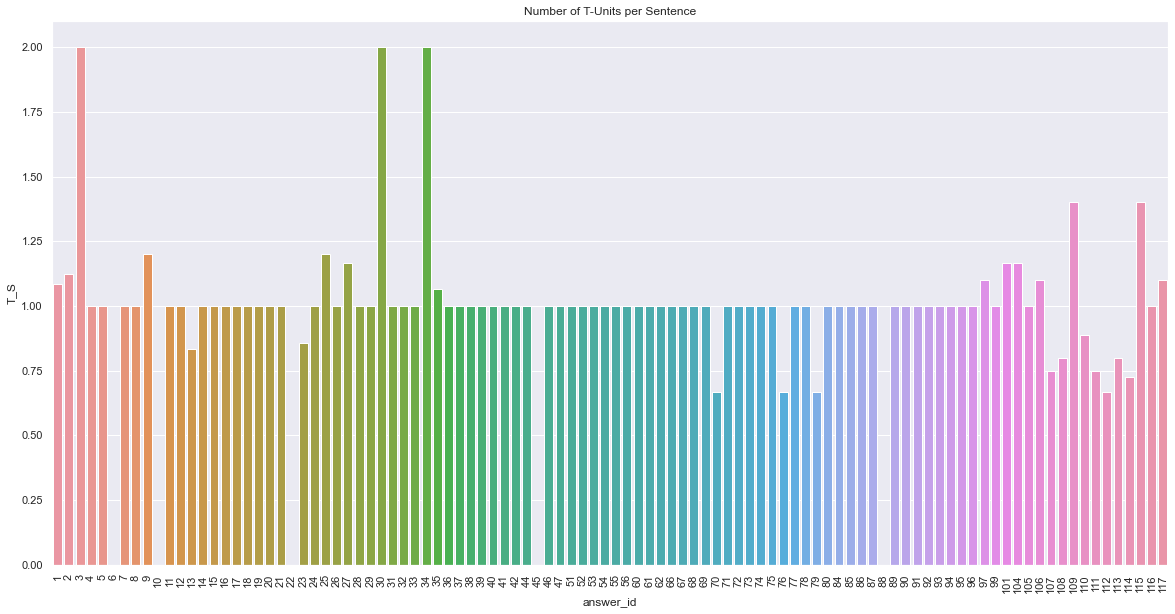

In [14]:
t_unit_per_sent = sns.barplot(
    data = taassc_measures,
    x="answer_id",
    y="T_S"
)
t_unit_per_sent.set(title="Number of T-Units per Sentence")
plt.xticks(rotation=90)
plt.show()

About what I expected: most essays had 1 T-unit per sentence since T-units and sentences match up in most cases.
However, some had values as low as 0 and as high as 2; let's take a look:

In [15]:
# Essay with T_S of 0
t_s_0 = taassc_measures[taassc_measures["T_S"] == 0]["answer_id"].values[0]
print(f"Essay {t_s_0}:\n{pelic[pelic['answer_id'] == t_s_0]['text'].values[0]}\n")

# Essay with T_S of 2
t_s_max = taassc_measures[taassc_measures["T_S"] == max(taassc_measures["T_S"])]["answer_id"].values[0]
print(f"Essay {t_s_max}:\n{pelic[pelic['answer_id'] == t_s_max]['text'].values[0]}")

Essay 22:
All of Them.

Essay 30:
when you want to enjoy drinking a tea you have to know the coract way to make it and by following these steps you will do a very good tea. At first,you have to boil some water. After that,you can put the tea urbs and put it in the boild water.some people prefear to put the tea urbs to the boild water wile it is in the stove or you can put it diractly in the cup.finaly,after you put the the tea urbes with the boild water you can put suger and you will enjoy with a very good cup of tea.


Okay, so the first essay has 0 T-units per sentence because it had no complete sentences, and the second essay has 2 T-units per sentence because it's almost entirely compound sentences.

### Mean Length of T-Units

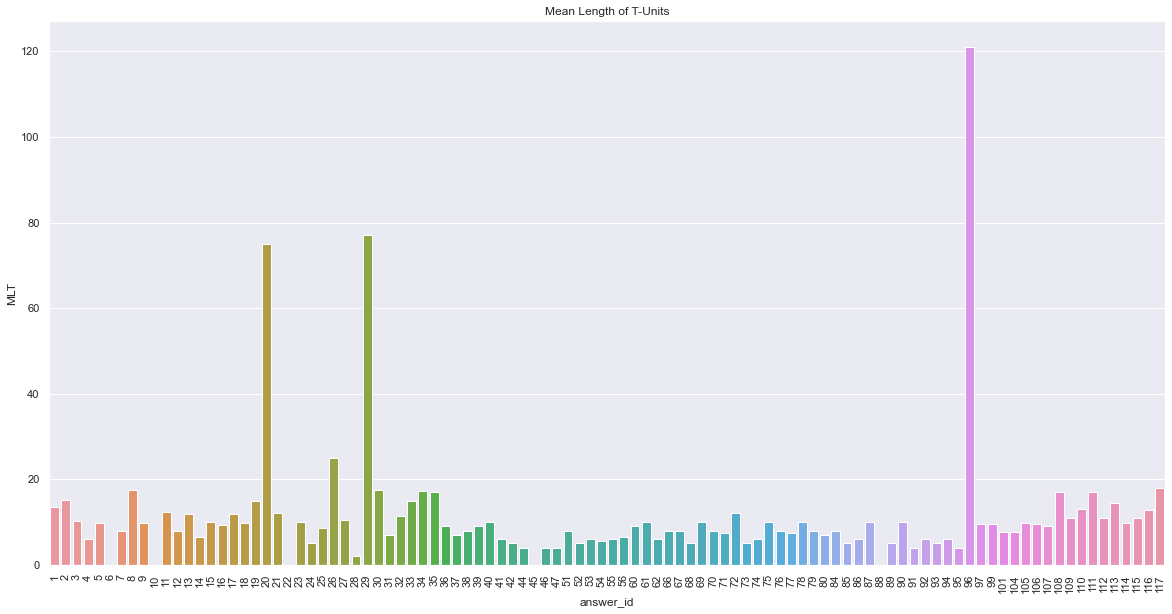

In [16]:
t_unit_mean_len = sns.barplot(
    data = taassc_measures,
    x="answer_id",
    y="MLT"
)
t_unit_mean_len.set(title="Mean Length of T-Units")
t_unit_mean_len.tick_params(bottom=False)
plt.xticks(rotation=90)
plt.show()

Once again, there are some very extreme values; some essays have a mean T-unit length of 0, and one essay even has a mean T-unit length of over 100.

In [17]:
# Essay with MLT of 0
mlt_0 = taassc_measures[taassc_measures["MLT"] == 0]["answer_id"].values[0]
print(f"Essay {mlt_0}:\n{pelic[pelic['answer_id'] == mlt_0]['text'].values[0]}\n")

# Essay with max MLT
mlt_2 = taassc_measures[taassc_measures["MLT"] == max(taassc_measures["MLT"])]["answer_id"].values[0]
print(f"Essay {mlt_2}:\n{pelic[pelic['answer_id'] == mlt_2]['text'].values[0]}")

Essay 22:
All of Them.

Essay 96:
Failing a test is not easy successful ,but if you want to do this,there are many method can reach this goal.For example,sometimes i always forget what the teacher say in the class,and i never write down any important thing in my notebook.So i never get a high score in my test.Then, you needn't to do your homework and don't go to class on time.When you have a test,don't write anything on your test paper if you know the answer.On the other hand,you needn't to review your classes everyday and don't highlight any important vocabulary or senternces on your book.Finally,if your follow tese steps, you'll esay to fail a test.


Okay, so the first essay has a mean T-unit length of 0 because there are no complete sentences.
I'm not sure why the second essay has such a high mean T-unit length, but I'm guessing that it may be because of the lack of whitespace after punctuation.

### Clauses per T-Unit

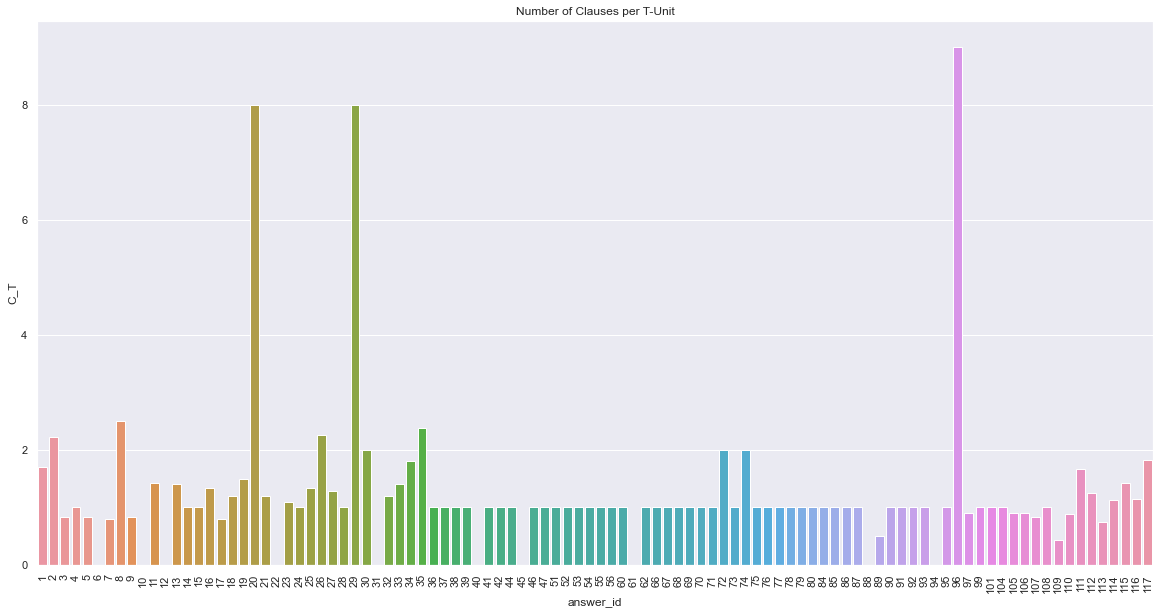

In [18]:
clause_per_t_unit = sns.barplot(
    data = taassc_measures,
    x="answer_id",
    y="C_T"
)
clause_per_t_unit.set(title="Number of Clauses per T-Unit")
plt.xticks(rotation=90)
plt.show()

Let's take a look at the extreme values:

In [19]:
# Essay with C_T of 0
c_t_0 = taassc_measures[taassc_measures["C_T"] == 0]["answer_id"].values[0]
print(f"Essay {c_t_0}:\n{pelic[pelic['answer_id'] == c_t_0]['text'].values[0]}\n")

# Essay with max C_T
c_t_max = taassc_measures[taassc_measures["C_T"] == max(taassc_measures["C_T"])]["answer_id"].values[0]
print(f"Essay {c_t_max}:\n{pelic[pelic['answer_id'] == c_t_max]['text'].values[0]}")

Essay 22:
All of Them.

Essay 96:
Failing a test is not easy successful ,but if you want to do this,there are many method can reach this goal.For example,sometimes i always forget what the teacher say in the class,and i never write down any important thing in my notebook.So i never get a high score in my test.Then, you needn't to do your homework and don't go to class on time.When you have a test,don't write anything on your test paper if you know the answer.On the other hand,you needn't to review your classes everyday and don't highlight any important vocabulary or senternces on your book.Finally,if your follow tese steps, you'll esay to fail a test.


Like mean T-unit length, it seems that the first essay has no complete sentences (or clauses) and the second is skewed because of the lack of whitespace after punctuation.

### Mean Length of Clauses

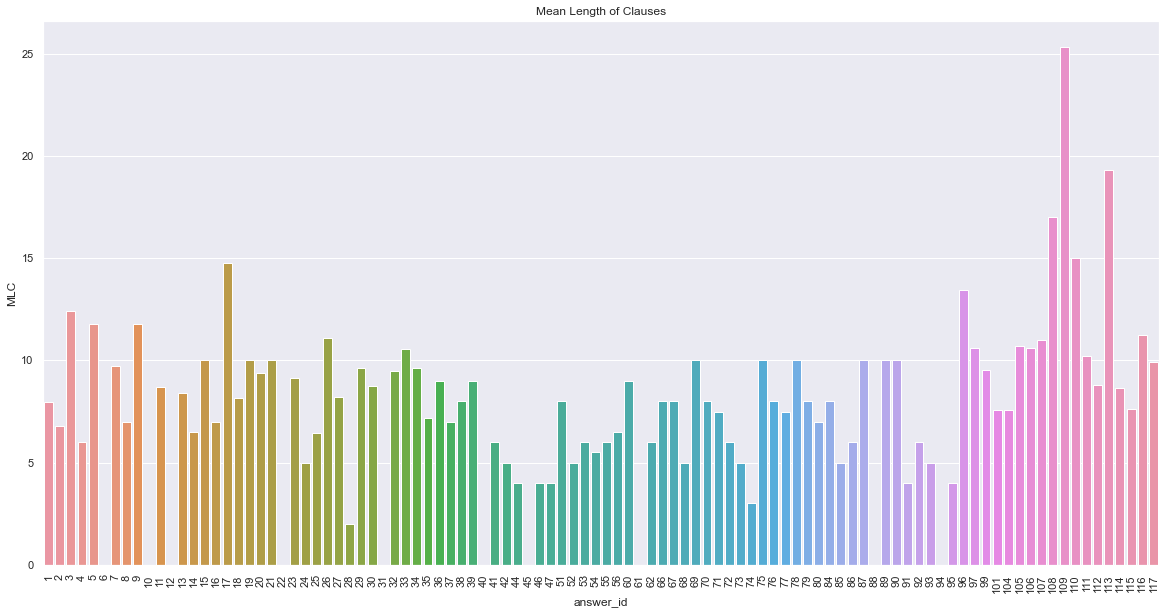

In [20]:
clause_mean_len = sns.barplot(
    data = taassc_measures,
    x="answer_id",
    y="MLC"
)
clause_mean_len.set(title="Mean Length of Clauses")
plt.xticks(rotation=90)
plt.show()

In [21]:
# Essay with MLC of 0
mlc_0 = taassc_measures[taassc_measures["MLC"] == 0]["answer_id"].values[0]
print(f"Essay {mlc_0}:\n{pelic[pelic['answer_id'] == mlc_0]['text'].values[0]}\n")

# Essay with max MLC
mlc_max = taassc_measures[taassc_measures["MLC"] == max(taassc_measures["MLC"])]["answer_id"].values[0]
print(f"Essay {mlc_max}:\n{pelic[pelic['answer_id'] == mlc_max]['text'].values[0]}")

Essay 22:
All of Them.

Essay 109:
My favorite recipe is how to make brownie. First, combining with half cup of butter, two eggs, and ¾ cup of sugar. Secondly, put ½ cup of flour, 1/3cup of cocoa flour, and ¼ tea spoon of breaking powder in another container, and mix them well. Thirdly, putting the materials of step 2 into the first one, and mix they well. Then put them into a container and put it in stove for 275F, 25 minutes.


Okay, the first essay makes sense, but the second one doesn't... TAASSC must've had trouble counting the number of clauses in this one.

### Prepositions per Clause

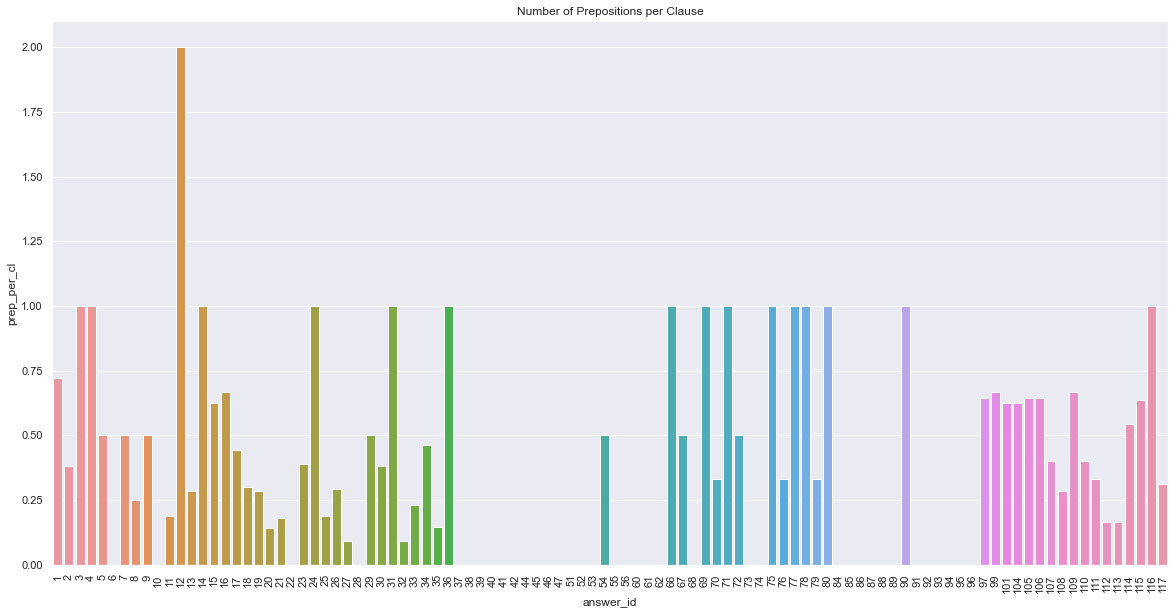

In [22]:
prep_per_clause = sns.barplot(
    data = taassc_measures,
    x="answer_id",
    y="prep_per_cl"
)
prep_per_clause.set(title="Number of Prepositions per Clause")
plt.xticks(rotation=90)
plt.show()

Okay, the values aren't *nearly* as extreme as before.
Let's take a look:

In [23]:
# Essay with prep_per_cl of 0
prep_per_cl_0 = taassc_measures[taassc_measures["prep_per_cl"] == 0]["answer_id"].values[0]
print(f"Essay {prep_per_cl_0}:\n{pelic[pelic['answer_id'] == prep_per_cl_0]['text'].values[0]}\n")

# Essay with max prep_per_cl
prep_per_cl_max = taassc_measures[taassc_measures["prep_per_cl"] == max(taassc_measures["prep_per_cl"])]["answer_id"].values[0]
print(f"Essay {prep_per_cl_max}:\n{pelic[pelic['answer_id'] == prep_per_cl_max]['text'].values[0]}")

Essay 22:
All of Them.

Essay 12:
i organize the instructions by time and importance.


I'm not sure why the second essay has such a high `prep_per_cl`; it only has 1 clause and 1 preposition...

### Subordinating Conjunctions per Clause

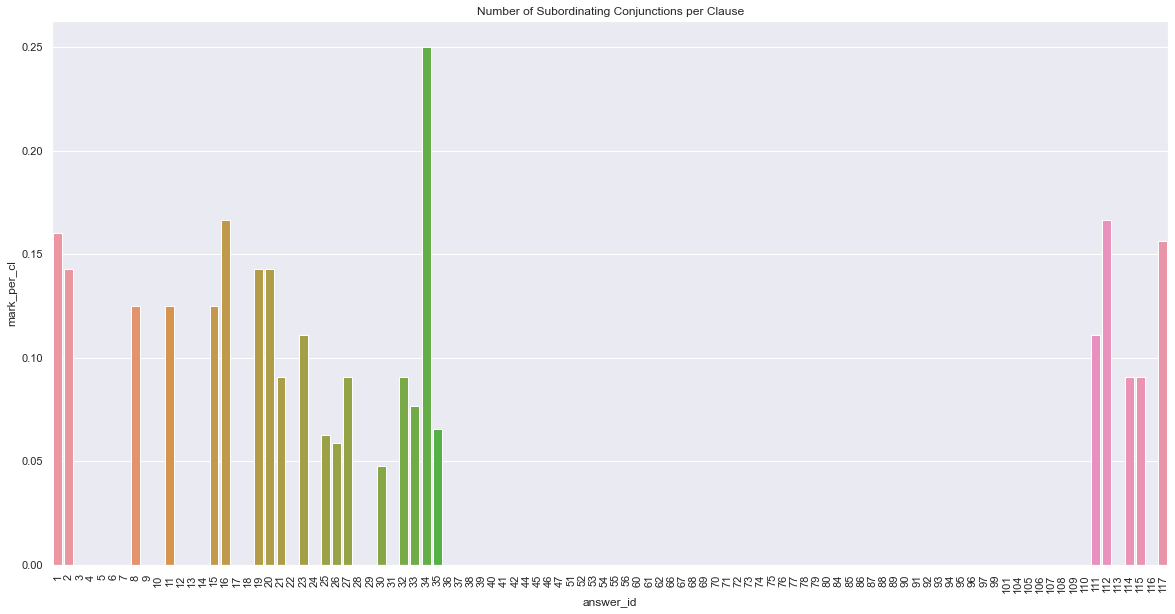

In [24]:
sc_per_clause = sns.barplot(
    data = taassc_measures,
    x="answer_id",
    y="mark_per_cl"
)
sc_per_clause.set(title="Number of Subordinating Conjunctions per Clause")
plt.xticks(rotation=90)
plt.show()

It seems that most of the essays didn't use any subordinating conjunctions... interesting.

Let's take a look at the extreme values:

In [25]:
# Essay with mark_per_cl of 0
sc_per_cl_0 = taassc_measures[taassc_measures["mark_per_cl"] == 0]["answer_id"].values[0]
print(f"Essay {sc_per_cl_0}:\n{pelic[pelic['answer_id'] == sc_per_cl_0]['text'].values[0]}\n")

# Essay with max mark_per_cl
sc_per_cl_max = taassc_measures[taassc_measures["mark_per_cl"] == max(taassc_measures["mark_per_cl"])]["answer_id"].values[0]
print(f"Essay {sc_per_cl_max}:\n{pelic[pelic['answer_id'] == sc_per_cl_max]['text'].values[0]}")

Essay 22:
All of Them.

Essay 34:
How to fail a test

 There are several ways for how to fail a test and I am of the best students in the ELI who knows how to fail a test. First of all, in my opinion you have to absent in most classes and if you came to the class you should provoke your teacher because that makes your teacher to be dislike you and this is the first thing to fail a test. For example, I have repeated reading class because I provoke that teacher and then let me fail a test. Second, if the first one doesn't work with you then, I recommend you to cheat in the test so, that you put your teacher in no other choice after that, he or she will give you 'f ' grade in the test. Finally, if you don't want to make trouble with your teacher by simply way don't answer to any question in the test and then you will make as heroes have done before.


lmao
> There are several ways for how to fail a test and I am of the best students in the ELI who knows how to fail a test.

Anyway, the second essay appears to have gotten such a high score because it genuinely uses a lot of subordinating clauses... very nice.

## Summary

All in all, the TAASSC processing seems to have been successful.
However, there are clearly some outliers in the data due to TAASSC struggling with non-standard use of whitespace, punctuation, etc.
Moving forward, I think that I could leave this data as is and continue onward with the analysis, or I could "clean up" the data and hopefully get more accurate parsing with TAASSC.
I'm hesitant to do the latter since I don't want to tamper with the students' responses and potentially significantly alter the distributions of the syntactic measures.
I'll have to think about this further.

As previously stated, I had to drop discourse markers from the list of measures that I was going to analyze since literally none of the essays had any.
I think I'll just stick with this slightly smaller set of measures.

From this point onward, the goal is to group the data by L1 and proficiency level and determine whether there are any statistically significant differences between those groups.